# This jupyter notebook provides all the details of Alpaca API

[1. Get historical/live Data](#1)

[2. Monitor results - Alpaca account level](#2)

[3. Monitor results - Strategy level](#3)

[4. Submit order](#4)

[5. Run multiprocess](#5)

In [ ]:
import alpaca_trade_api as tradeapi
import pandas as pd 
import numpy as np
import os
from alpaca_trade_api import REST

In [8]:
os.environ['APCA_API_KEY_ID'] = 'PK2HXY1KBTX5UCJ8EJAY'
os.environ['APCA_API_SECRET_KEY'] = 'md0AXAym1rUh28KT9c4KiSCohcMbN25JfnndPzbC'
os.environ['APCA_API_BASE_URL'] = 'https://paper-api.alpaca.markets'
api = REST()

<a id='1'></a>
# Get Data

* Exhaustive list of symbols
* Downloading the data

In [42]:
result = api.list_assets(status='active')

In [43]:
result_df = pd.DataFrame()

print(result[0]) # cum_qty, price, symbol, transaction_time

Asset({   'class': 'us_equity',
    'easy_to_borrow': False,
    'exchange': 'OTC',
    'fractionable': False,
    'id': '27c41b74-a81a-4ac4-86fe-56707b6fd838',
    'maintenance_margin_requirement': 100,
    'marginable': False,
    'name': 'BLONDER TONGUE LABORATORIES INC Common Stock',
    'shortable': False,
    'status': 'active',
    'symbol': 'BDRL',
    'tradable': False})


In [82]:
result[1]

Asset({   'class': 'us_equity',
    'easy_to_borrow': False,
    'exchange': 'OTC',
    'fractionable': False,
    'id': '7a3d853a-2d34-4624-9061-6aa5e1bf80f5',
    'maintenance_margin_requirement': 100,
    'marginable': False,
    'name': 'Aluminum Corp China Ltd Sponsored ADR Repstg H Shs (China)',
    'shortable': False,
    'status': 'active',
    'symbol': 'ACHHY',
    'tradable': False})

In [64]:
type(result[0])

alpaca_trade_api.entity.Asset

In [54]:
result_df = pd.DataFrame(columns = ['class','exchange','symbol'])

In [65]:
class_list = []
exchange_list = []
symbol_list = []

for res in result:
    #print(res.class)
    #class_list.append(res.class)
    exchange_list.append(res.exchange)
    symbol_list.append(res.symbol)

result_df = pd.DataFrame({ 'exchange': exchange_list, 'Symbol': symbol_list})
print(result_df)

      exchange     Symbol
0          OTC       BDRL
1          OTC      ACHHY
2          OTC      ACLLY
3          OTC       ACUT
4          OTC       ADXS
...        ...        ...
11098     FTXU   DOGE/USD
11099     FTXU  DOGE/USDT
11100     FTXU    ETH/BTC
11101     FTXU    ETH/USD
11102     FTXU   ETH/USDT

[11103 rows x 2 columns]


In [67]:
result_df.Symbol.unique()

array(['BDRL', 'ACHHY', 'ACLLY', ..., 'ETH/BTC', 'ETH/USD', 'ETH/USDT'],
      dtype=object)

In [68]:
result_df.exchange.unique()

array(['OTC', 'NYSE', 'NASDAQ', 'AMEX', 'ARCA', 'BATS', 'FTXU'],
      dtype=object)

In [131]:
#Data download
historical_data = api.get_bars(
    symbol='TSLA', #any symbol is acceptable if it can be found in Alpaca API
    timeframe=TimeFrame.Hour, 
    start="2018-01-01T00:00:00-00:00",
    end="2018-02-01T00:00:00-00:00"
).df

In [132]:
historical_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 09:00:00+00:00,312.0000,312.00,311.80,311.80,500,4,311.871000
2018-01-02 10:00:00+00:00,311.5000,311.50,311.50,311.50,847,3,311.500000
2018-01-02 11:00:00+00:00,310.9900,311.89,310.99,311.89,1012,17,311.328360
2018-01-02 12:00:00+00:00,311.0000,311.29,310.75,311.00,11519,100,310.994353
2018-01-02 13:00:00+00:00,311.5000,312.00,310.99,311.50,8021,85,311.429299
...,...,...,...,...,...,...,...
2018-01-31 19:00:00+00:00,354.8695,355.27,351.57,353.23,717878,6836,353.168927
2018-01-31 20:00:00+00:00,353.1200,354.97,351.00,354.46,839081,10979,353.272195
2018-01-31 21:00:00+00:00,354.3100,354.61,353.75,354.00,764607,276,354.309591


<a id='2'></a>
# Monitoring Results - Account Level


## Items on Dashboard

* get_all_transactions : List of all transactions and full activity 
* realized_profit_df : Closed positions
* get_open_positions : Open positions  
* portfolio_changes_output : charts of PnL and Equity
* get_metrics : get all metrics

https://github.com/chunyip135/AlgoQuant_Dashboard
https://docs.google.com/spreadsheets/d/1hPxsuwdDvpZpQYG2yi_djwcDG1RDAw1RcS-QZ5prUPo/edit#gid=0
https://datastudio.google.com/u/0/reporting/632a4e76-496c-4ab5-8e8f-85296118e961/page/dZktC?s=olg3z5e2JEI


In [154]:
#get_all_transactions(api)
#api.get_portfolio_history(trade)
#api.list_positions()


In [133]:
result = api.get_activities()
for res in result:
        qty_list.append(res.cum_qty)
        price_list.append(res.price)
        symbol_list.append(res.symbol)
        transaction_time_list.append(res.transaction_time)
        type_list.append(res.side)

## Function 1 - All orders and PnL

In [89]:
def get_all_transactions(api):
    result = api.get_activities()

    result_df = pd.DataFrame()

    #print(result[0]) # cum_qty, price, symbol, transaction_time

    result_df = pd.DataFrame(columns = ['Qty','price','symbol','transaction_time'])

    qty_list = []
    price_list = []
    symbol_list = []
    transaction_time_list = []
    type_list = []

    for res in result:
        qty_list.append(res.cum_qty)
        price_list.append(res.price)
        symbol_list.append(res.symbol)
        transaction_time_list.append(res.transaction_time)
        type_list.append(res.side)



    result_df = pd.DataFrame({
        'Qty': qty_list, 
        'Price': price_list, 
        'Symbol': symbol_list, 
        'Transaction_time': transaction_time_list, 
        'Type': type_list})

    return result_df

def realized_profit_df(api):

    result_df = get_all_transactions(api)

    df_buy = result_df[result_df.Type == 'buy']

    df_sell = result_df[result_df.Type == 'sell']

    df = pd.merge(df_buy, df_sell, on = 'Symbol', how = 'right', suffixes = ['_buy','_sell'])

    #print(df_sell)

    testing = df_sell.sort_values(by = 'Transaction_time')

    testing['Price'] = testing.Price.astype('float')
    df_buy['Price'] = df_buy.Price.astype('float')

    output_frame = pd.DataFrame(columns = ['Symbol', 'Qty','Avg_cost','Avg_holding_period',
                                 'Earliest_buy_time','Latest_buy_time','Sell_time','Profit_per_unit','Total Profit', 'Winning_bet?'])

    for sym in testing.Symbol.unique():
        #print(sym)
        buy = df_buy.loc[df_buy.Symbol == sym]
        sell = testing.loc[testing.Symbol == sym]

        obs = [] # completed sell\'s index
        for i, row in sell.iterrows():
            output_dic = {}
            if i not in obs:
                out = buy.loc[(buy.Transaction_time < row.Transaction_time)]
                idx = [j for j in out.index if j not in obs]
                out = out.loc[idx]
                assert out.shape[0] == int(row.Qty)
                
                # Avg_cost
                #print(row.Price - out.groupby('Symbol').Price.mean())
                #print(row.Transaction_time - out.groupby('Symbol').Transaction_time.mean())
                output_dict = {'Symbol': sym, 
                               'Qty': int(row.Qty), 
                               'Avg_cost': round(out.groupby('Symbol').Price.mean()[0],2),
                               'Avg_holding_period': (row.Transaction_time - out.groupby('Symbol').Transaction_time.mean())[0],
                               'Earliest_buy_time': out.groupby('Symbol').Transaction_time.min()[0],
                               'Latest_buy_time': out.groupby('Symbol').Transaction_time.max()[0],
                               'Sell_time': row.Transaction_time,
                               'Profit_per_unit': round(row.Price - out.groupby('Symbol').Price.mean()[0],2),
                               'Total Profit': round((row.Price - out.groupby('Symbol').Price.mean())[0] * int(row.Qty),2),
                               'Winning_bet?': True if round(row.Price - out.groupby('Symbol').Price.mean()[0],2) > 0 else False}
                output_frame = output_frame.append(output_dict, ignore_index = True)
                
                if len(idx) > 1:
                    for ix in idx:
                        obs.append(ix)
                else:
                    obs.append(idx[0])
            

    output_frame = output_frame.sort_values('Sell_time', ascending = False)
    output_frame['Avg_holding_period'] = output_frame['Avg_holding_period'].apply(lambda x: x.days)

    return output_frame

In [91]:
result_df = get_all_transactions(api)
realized_profit_output = realized_profit_df(api)

In [86]:
result_df.head()

,Qty,Price,Symbol,Transaction_time,Type
0,1,149.36,AAPL,2022-11-02 13:30:04.021749+00:00,buy
1,1,149.18,AAPL,2022-11-02 13:30:03.765413+00:00,buy
2,1,149.12,AAPL,2022-11-02 13:30:03.242964+00:00,buy
3,1,149.07,AAPL,2022-11-02 13:30:02.725059+00:00,buy
4,10,149.07,AAPL,2022-11-02 13:30:02.709087+00:00,buy


In [87]:
realized_profit_output.head()

,Symbol,Qty,Avg_cost,Avg_holding_period,Earliest_buy_time,Latest_buy_time,Sell_time,Profit_per_unit,Total Profit,Winning_bet?
0,AMZN,1,119.35,0,2022-10-21 19:29:20.616225+00:00,2022-10-21 19:29:20.616225+00:00,2022-10-21 19:29:44.262432+00:00,-0.02,-0.02,False


### Function 2 - portfolio changes and metrics

In [105]:
from alpaca_trade_api.rest import REST, TimeFrame
import pandas as pd 
import numpy as np
import os
from alpaca_trade_api import REST

import datetime as dt

def get_trading_cal(api):
    cal = api.get_calendar()
    cal_ls = []
    for c in cal:
        cal_ls.append(c.date)
      
    cal_ls = pd.Series(cal_ls)
    return cal_ls

def get_portfolio_changes(api):
    
    acc_start = api.get_account().created_at.strftime('%Y-%m-%d') # the date where account was created

    cal_ls = get_trading_cal(api) # obtain trading calendar

    # Obtain the trading days that were between the account created date and today, then convert to date format
    trading_days = cal_ls[(cal_ls >= acc_start) & (cal_ls < dt.datetime.strftime(dt.datetime.today(), '%Y-%m-%d'))]
    trading_days = trading_days.apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))

    # Obtain the portfolio changes
    df_trade = pd.DataFrame(columns = ['timestamp','equity','pnl','pnl (pct)'])

    for trade in trading_days:
        result = api.get_portfolio_history(trade)
        profit_loss = result.profit_loss
        pnl_pct = result.profit_loss_pct
        timestamp = [dt.datetime.fromtimestamp(val).strftime('%Y-%m-%d %H:%M') for val in result.timestamp]
        df_trade = pd.concat([df_trade, pd.DataFrame({'timestamp': timestamp, 'equity': result.equity, 'pnl':profit_loss, 'pnl (pct)': pnl_pct })], axis = 0)

    # Remove duplicates record with the same date
    df_trade = df_trade.sort_values(by = 'timestamp').drop_duplicates(subset = ['timestamp'],ignore_index=True, keep = 'first')

    df_trade['date'] = df_trade['timestamp'].apply(lambda x: x[:10])

    # Only query the last record of the day for intraday changes
    df_agg = df_trade.groupby('date').last()
    df_agg = df_agg.reset_index().drop('timestamp', axis = 1)

    max_drawdown = 10000 - df_agg.equity.min()
    
    return df_agg, max_drawdown

In [106]:
from alpaca_trade_api.rest import REST, TimeFrame
import pandas as pd 
import numpy as np
import os
#import pygsheets

# from ta.momentum  import RSIIndicator  
# from ta.trend import SMAIndicator
import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time 

def get_metrics(api, max_drawdown):
	acc_details = api.get_account()
	cash_balance = acc_details.cash
	portfolio_value = acc_details.portfolio_value
	acc_status = acc_details.status
	long_market_value = acc_details.long_market_value

	output = pd.DataFrame({
				'cash_balance': [cash_balance],
				'portfolio_value': [portfolio_value],
				'long_market_value': [long_market_value],
				'last_updated':  [dt.datetime.today().strftime('%Y-%m-%d %H:%M')],
				'max_drawdown': [max_drawdown]
				})

	return output

In [108]:
portfolio_changes_output, max_drawdown = get_portfolio_changes(api)
metrics_output = get_metrics(api, max_drawdown)


In [109]:
portfolio_changes_output

,date,equity,pnl,pnl (pct)
0,2022-08-22,100000.00,0.00,0.000000
1,2022-08-23,100000.00,0.00,0.000000
2,2022-08-24,100000.00,0.00,0.000000
3,2022-08-25,100000.00,0.00,0.000000
4,2022-08-26,100000.00,0.00,0.000000
...,...,...,...,...
59,2022-11-14,99970.68,-53.96,-0.000205
60,2022-11-15,100037.56,66.88,0.000464
61,2022-11-16,99990.06,-47.50,-0.000011
62,2022-11-17,100063.40,73.34,0.000722


<AxesSubplot:>

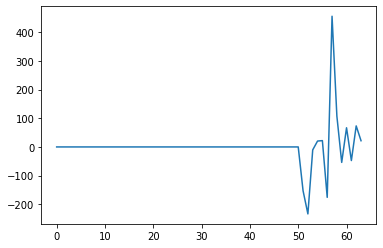

In [119]:
portfolio_changes_output['pnl'].plot()

<AxesSubplot:>

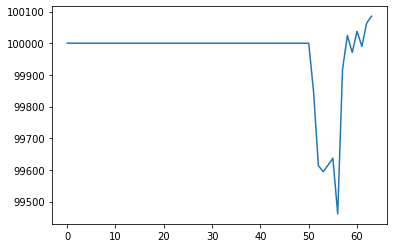

In [120]:
portfolio_changes_output['equity'].plot()

In [110]:
metrics_output

,cash_balance,portfolio_value,long_market_value,last_updated,max_drawdown
0,94336.04,100069.48,5733.44,2022-11-20 14:40,-89461.1


## Function 3 - unrealized pnl

In [114]:
from alpaca_trade_api.rest import REST, TimeFrame
import pandas as pd 
import numpy as np
import os
#import pygsheets

# from ta.momentum  import RSIIndicator  
# from ta.trend import SMAIndicator
import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time 

def get_open_positions(api):
	open_positions = api.list_positions()

	asset_class_ls = []
	avg_entry_price_ls = []
	change_today_ls = []
	cost_basis_ls = []
	current_price_ls = []
	exchange_ls = []
	lastday_price_ls = []
	market_value_ls = []
	qty_ls = []
	side_ls = []
	symbol_ls = []
	unrealized_intraday_pl_ls = []
	unrealized_intraday_plpc_ls = []
	unrealized_pl_ls = []
	unrealized_plpc_ls = []

	for pos in open_positions:
	    asset_class_ls.append(pos.asset_class)
	    avg_entry_price_ls.append(pos.avg_entry_price)
	    change_today_ls.append(pos.change_today)
	    cost_basis_ls.append(pos.cost_basis)
	    current_price_ls.append(pos.current_price)
	    exchange_ls.append(pos.exchange)
	    lastday_price_ls.append(pos.lastday_price)
	    market_value_ls.append(pos.market_value)
	    qty_ls.append(pos.qty)
	    side_ls.append(pos.side)
	    symbol_ls.append(pos.symbol)
	    unrealized_intraday_pl_ls.append(pos.unrealized_intraday_pl)
	    unrealized_intraday_plpc_ls.append(pos.unrealized_intraday_plpc)
	    unrealized_pl_ls.append(pos.unrealized_pl)
	    unrealized_plpc_ls.append(pos.unrealized_plpc)
	    
	op_df = pd.DataFrame({'Symbol': symbol_ls, 
	                      'Asset_class': asset_class_ls, 
	                      'Qty': qty_ls,
	                      'Avg_entry_price': avg_entry_price_ls,
	                      'Change_today': change_today_ls,
	                      'Cost_basis': cost_basis_ls, 
	                      'Current_price': current_price_ls,
	                      'Exchange': exchange_ls,
	                      'Lastday_price': lastday_price_ls,
	                      'Market_value': market_value_ls,
	                      'Side': side_ls,
	                      'Unrealized_intraday_pl ($)': unrealized_intraday_pl_ls,
	                      'Unrealized_intraday_pl (%)': unrealized_intraday_plpc_ls,
	                      'Unrealized_pl ($)': unrealized_pl_ls,
	                      'Unrealized_pl (%)': unrealized_plpc_ls
	                     })

	# Convert the columns format
	op_df['Avg_entry_price'] = op_df['Avg_entry_price'].astype('float')
	op_df['Change_today'] = op_df['Change_today'].astype('float')
	op_df['Current_price'] = op_df['Current_price'].astype('float')
	op_df['Lastday_price'] = op_df['Lastday_price'].astype('float')
	op_df['Market_value'] = op_df['Market_value'].astype('float')
	op_df['Unrealized_intraday_pl ($)'] = op_df['Unrealized_intraday_pl ($)'].astype('float')
	op_df['Unrealized_intraday_pl (%)'] = op_df['Unrealized_intraday_pl (%)'].astype('float')
	op_df['Unrealized_pl ($)'] = op_df['Unrealized_pl ($)'].astype('float')
	op_df['Unrealized_pl (%)'] = op_df['Unrealized_pl (%)'].astype('float')
	op_df['Qty'] = op_df['Qty'].astype('int')

	op_df['Avg_entry_price'] = op_df.Avg_entry_price.round(2)

	op_df = op_df.sort_values(by = 'Unrealized_pl (%)', ascending = False)
	op_df['Unrealized_pl (%)'] = op_df['Unrealized_pl (%)'].mul(100)
	op_df['Unrealized_intraday_pl (%)'] = op_df['Unrealized_intraday_pl (%)'].mul(100)

	return op_df


def get_trading_cal(api):
    cal = api.get_calendar()
    cal_ls = []
    for c in cal:
        cal_ls.append(c.date)
      
    cal_ls = pd.Series(cal_ls)
    return cal_ls

def get_data(api, stock_ls, start, end = None):
    
  # first_half
    indexes = np.arange(0,len(stock_ls),5)
    for i in range(len(indexes)-1):
        data = api.get_bars(
                      symbol =  stock_ls[indexes[i]:indexes[i+1]],
                      timeframe = TimeFrame.Day,
                      start = start,
                      end = end,
                      limit = 10000,
                      adjustment= 'raw',
                      ).df
        if i == 0:
            db = data
        else:
            db = db.append(data)
    return db

# def RSI_SMA(data, symbol_list):
#     alerts = []
#     for symbol in symbol_list:
#         df = data.loc[data.symbol == symbol] # get individual stock price


#         # Calculate technical indicators
#         rsi4 = RSIIndicator(df.close, window = 4)

#         sma200 = SMAIndicator(df.close, 200)

#         df['rsi4'] = rsi4.rsi()
#         df['sma200'] = sma200.sma_indicator()
        
#         try:
#             latest = df.iloc[-1,:] # obtain latest indicators' values
#         except:
#             alerts.append([symbol,None, None])

#         alerts.append([symbol,latest.rsi4, latest.sma200])

#     alerts_df = pd.DataFrame(alerts, columns=['Symbol','RSI4','SMA200'])
#     alerts_df.set_index('Symbol', inplace = True)

#     return alerts_df

def full_df_pipeline(api):

	op_df = get_open_positions(api)

	cal_ls = get_trading_cal(api)
	tdy_date = dt.datetime.strftime(dt.datetime.today(), format = '%Y-%m-%d')
	last_trading_date = pd.Timestamp(cal_ls[cal_ls[cal_ls <= tdy_date].index[-3]]).strftime('%Y-%m-%d')
	print(last_trading_date)

	df_data = get_data(api, op_df.Symbol.unique(), start = '2019-01-01', end = last_trading_date)

	df_ta = RSI_SMA(df_data,op_df.Symbol.unique())

	full_df = op_df.join(df_ta, on = 'Symbol')
	full_df = full_df.set_index(np.arange(full_df.shape[0]))

	return full_df

In [115]:
get_open_positions = get_open_positions(api)

In [116]:
get_open_positions

,Symbol,Asset_class,Qty,Avg_entry_price,Change_today,Cost_basis,Current_price,Exchange,Lastday_price,Market_value,Side,Unrealized_intraday_pl ($),Unrealized_intraday_pl (%),Unrealized_pl ($),Unrealized_pl (%)
0,AAPL,us_equity,38,149.05,-0.00271,5663.92,150.88,NASDAQ,151.29,5733.44,long,-15.58,-0.271003,69.52,1.227418


<a id='3'></a>
# Monitoring Results - Strategy Level

* get_all_transactions_strategy : Use order id csv - done
* realized_profit_df_strategy : input order id - done
* get_open_positions_strategy : get unrealised PnL for all open positions of a strategy
* portfolio_changes_output : Get change from the initial portfolio level
* get_metrics : get all metrics using the portfolio changes output

In [186]:
# result_df = pd.DataFrame(columns = ['Qty','price','symbol','transaction_time','order_id'])

# order_id_list = []

# for res in result:
#     order_id_list.append(res.order_id)

# pd.DataFrame(order_id_list).to_csv('Strategy_order_ids.csv', index=False) 

In [193]:
order_ids = pd.read_csv('Strategy_order_ids.csv')['0'].values.tolist()
order_ids

['3d8ee353-ba04-4a57-971d-c2b5d5a215fd',
 '59e47505-2593-4ecf-8693-1eaebfe79aad',
 'eec8eab6-cd05-4f9b-b241-493e18ac8aa2',
 '3d668a63-ff79-4e33-b804-5a7a363d81ca']

In [167]:
#api.list_orders('all', nested=True)

## Function 1 - get details of the strategy and realized PnL

In [194]:
def get_all_transactions_strategy(api, order_ids):
    result = api.get_activities()

    result_df = pd.DataFrame()

    #print(result[0]) # cum_qty, price, symbol, transaction_time

    result_df = pd.DataFrame(columns = ['Qty','price','symbol','transaction_time'])

    qty_list = []
    price_list = []
    symbol_list = []
    transaction_time_list = []
    type_list = []

    for res in result:
        if (res.order_id in order_ids):
            qty_list.append(res.cum_qty)
            price_list.append(res.price)
            symbol_list.append(res.symbol)
            transaction_time_list.append(res.transaction_time)
            type_list.append(res.side)



    result_df = pd.DataFrame({
        'Qty': qty_list, 
        'Price': price_list, 
        'Symbol': symbol_list, 
        'Transaction_time': transaction_time_list, 
        'Type': type_list})

    return result_df

In [195]:
get_all_transactions_strategy(api, order_ids )

,Qty,Price,Symbol,Transaction_time,Type
0,1,149.02,AAPL,2022-11-02 13:30:00.836677+00:00,buy
1,1,149.05,AAPL,2022-11-02 13:30:00.050820+00:00,buy
2,1,119.33,AMZN,2022-10-21 19:29:44.262432+00:00,sell
3,1,119.35,AMZN,2022-10-21 19:29:20.616225+00:00,buy


In [198]:
def realized_profit_df_strategy(api, order_ids):

    result_df = get_all_transactions_strategy(api, order_ids)

    df_buy = result_df[result_df.Type == 'buy']

    df_sell = result_df[result_df.Type == 'sell']

    df = pd.merge(df_buy, df_sell, on = 'Symbol', how = 'right', suffixes = ['_buy','_sell'])

    #print(df_sell)

    testing = df_sell.sort_values(by = 'Transaction_time')

    testing['Price'] = testing.Price.astype('float')
    df_buy['Price'] = df_buy.Price.astype('float')

    output_frame = pd.DataFrame(columns = ['Symbol', 'Qty','Avg_cost','Avg_holding_period',
                                 'Earliest_buy_time','Latest_buy_time','Sell_time','Profit_per_unit','Total Profit', 'Winning_bet?'])

    for sym in testing.Symbol.unique():
        #print(sym)
        buy = df_buy.loc[df_buy.Symbol == sym]
        sell = testing.loc[testing.Symbol == sym]

        obs = [] # completed sell\'s index
        for i, row in sell.iterrows():
            output_dic = {}
            if i not in obs:
                out = buy.loc[(buy.Transaction_time < row.Transaction_time)]
                idx = [j for j in out.index if j not in obs]
                out = out.loc[idx]
                assert out.shape[0] == int(row.Qty)
                
                # Avg_cost
                #print(row.Price - out.groupby('Symbol').Price.mean())
                #print(row.Transaction_time - out.groupby('Symbol').Transaction_time.mean())
                output_dict = {'Symbol': sym, 
                               'Qty': int(row.Qty), 
                               'Avg_cost': round(out.groupby('Symbol').Price.mean()[0],2),
                               'Avg_holding_period': (row.Transaction_time - out.groupby('Symbol').Transaction_time.mean())[0],
                               'Earliest_buy_time': out.groupby('Symbol').Transaction_time.min()[0],
                               'Latest_buy_time': out.groupby('Symbol').Transaction_time.max()[0],
                               'Sell_time': row.Transaction_time,
                               'Profit_per_unit': round(row.Price - out.groupby('Symbol').Price.mean()[0],2),
                               'Total Profit': round((row.Price - out.groupby('Symbol').Price.mean())[0] * int(row.Qty),2),
                               'Winning_bet?': True if round(row.Price - out.groupby('Symbol').Price.mean()[0],2) > 0 else False}
                output_frame = output_frame.append(output_dict, ignore_index = True)
                
                if len(idx) > 1:
                    for ix in idx:
                        obs.append(ix)
                else:
                    obs.append(idx[0])
            

    output_frame = output_frame.sort_values('Sell_time', ascending = False)
    output_frame['Avg_holding_period'] = output_frame['Avg_holding_period'].apply(lambda x: x.days)

    return output_frame

In [199]:
realized_profit_df_strategy(api, order_ids)

,Symbol,Qty,Avg_cost,Avg_holding_period,Earliest_buy_time,Latest_buy_time,Sell_time,Profit_per_unit,Total Profit,Winning_bet?
0,AMZN,1,119.35,0,2022-10-21 19:29:20.616225+00:00,2022-10-21 19:29:20.616225+00:00,2022-10-21 19:29:44.262432+00:00,-0.02,-0.02,False


### Function 2 - portfolio changes and metrics

In [ ]:
https://forum.alpaca.markets/t/easy-way-to-calculate-profit-per-trade-in-python/1708/6

In [200]:
api.get_portfolio_history(trade)

PortfolioHistory({   'base_value': 100063.4,
    'equity': [   100118.5,
                  100113.94,
                  100090.38,
                  100087.34,
                  100098.74,
                  100087.34,
                  100093.42,
                  100082.78,
                  100077.84,
                  100076.32,
                  100067.96,
                  100074.04,
                  100077.08,
                  100072.52,
                  100082.02,
                  100074.8,
                  100084.68,
                  100085.06,
                  100077.08,
                  100073.28,
                  100072.14,
                  100073.28,
                  100077.08,
                  100083.16,
                  100081.64,
                  100081.64,
                  100084.68,
                  100086.96,
                  100094.18,
                  100092.28,
                  100092.28,
                  100077.08,
                  100073.66,


In [203]:
import pandas as pd
from tabulate import tabulate
import pytz
import datetime as dt
from datetime import date

# pass the API and prevDays (0 for today, 1 since yesterday...)
def report2(api, prevDays):
    #
    # get all closed orders and import them into a dataframe
    #
    orderTotal = 500
    today = dt.date.today() - dt.timedelta(days=prevDays)
    today = dt.datetime.combine(today, dt.datetime.min.time())
    today = today.strftime("%Y-%m-%dT%H:%M:%SZ")
    #print(today)
    orders = api.list_orders(status='all', limit=orderTotal, after=today)
    if not orders:
        return
    dfOrders = pd.DataFrame()
    for o in orders:
        # convert dot notation to dict
        d = vars(o)
        # import dict into dataframe
        df = pd.DataFrame.from_dict(d, orient='index')
        # append to dataframe
        dfOrders = dfOrders.append(df, ignore_index=True)

    # select filled orders with buy or sell
    dfSel = dfOrders
    # choose a subset (use .copy() as we are slicing and to avoid warning)
    dfSel = dfSel[['submitted_at', 'filled_at', 'symbol', 'filled_qty', 'side', 'type', 'filled_avg_price', 'status']].copy()

    # convert filled_at to date
    dfSel['submitted_at'] = pd.to_datetime(dfSel['submitted_at'], format="%Y-%m-%d %H:%M:%S")
    dfSel['filled_at']    = pd.to_datetime(dfSel['filled_at'], format="%Y-%m-%d %H:%M:%S")
    # convert to our timezone
    dfSel['submitted_at'] = dfSel['submitted_at'].dt.tz_convert('America/New_York')
    dfSel['filled_at']    = dfSel['filled_at'].dt.tz_convert('America/New_York')
    # remove millis
    dfSel['submitted_at'] = dfSel['submitted_at'].dt.strftime("%Y-%m-%d %H:%M:%S")
    dfSel['filled_at']    = dfSel['filled_at'].dt.strftime("%Y-%m-%d %H:%M:%S")

    # Sort: https://kanoki.org/2020/01/28/sort-pandas-dataframe-and-series/
    # need to sort in order to perform the proper calculations
    # sort based on the following sequence of types: market then limit, then stop_limit
    dfSel['type'] = pd.Categorical(dfSel['type'], categories=["market", "limit", "stop_limit"])
    # sort first based on symbol, then type as per the list above, then submitted date
    dfSel.sort_values(by=['symbol', 'submitted_at', 'type'], inplace=True, ascending=True)

    # reset index
    dfSel.reset_index(drop=True, inplace=True)
    # drop the 'side' column
    # dfProfit = dfSel.drop('side', 1)
    dfProfit = dfSel
    # add empty 'profit' column
    dfProfit['profit'] = ''

    totalProfit = 0.0
    profitCnt   = 0
    lossCnt     = 0
    slCnt       = 0
    ptCnt       = 0
    trCnt       = 0
    qty         = 0
    profit      = 0
    sign        = {'buy': -1, 'sell': 1}

    # show header row
    #print(tabulate(dfSel[:0], headers='keys', tablefmt='simple', showindex=False))

    for index, row in dfSel.iterrows():
        # show data row
        #print(index, tabulate(dfSel[index:index+1], headers='', tablefmt='plain'))

        # conditions:
        # - buy/sell have the same symbol
        # - a trade is considered if no new/held orders are still open
        # - once qty is 0 a complete trade is confirmed and profit calculated
        # - a filled_avg_price is not None

        if index > 0:
            if dfSel['symbol'][index - 1] != dfSel['symbol'][index]:
                qty    = 0
                profit = 0

        if dfSel['status'][index] == 'held':
            continue
        if dfSel['status'][index] == 'new':
            continue
        if dfSel['filled_avg_price'][index] is None:
            continue
        if dfSel['filled_avg_price'][index] == '':
            continue
        if dfSel['filled_avg_price'][index] == 'None':
            continue

        #print(index, tabulate(dfSel[index:index+1], headers='', tablefmt='plain'))

        side      = dfSel['side'][index]
        filledQty = int(dfSel['filled_qty'][index]) * sign[side]
        qty       = qty + filledQty
        price     = float(dfSel['filled_avg_price'][index])
        pl        = filledQty * price
        profit    = profit + pl

        #print(f"{dfSel['symbol'][index]}: qty {filledQty} price {price} profit {profit:.3f}")

        if qty==0:
            # complete trade
            trCnt = trCnt + 1
            # put the profit in its column
            #dfProfit['profit'][index] = profit
            dfProfit.loc[index, 'profit'] = round(profit, 2)
            totalProfit = totalProfit + profit
            if profit >= 0:
                profitCnt = profitCnt + 1
                if dfSel['type'][index] == 'limit':
                    ptCnt = ptCnt + 1
            else:
                lossCnt = lossCnt + 1
                if dfSel['type'][index] == 'stop_limit':
                    slCnt = slCnt + 1
            profit = 0

    # append the total
    dfProfit.loc["Total", "profit"] = round(totalProfit, 2)  # dfProfit.profit.sum()

    # print profit report
    print(tabulate(dfProfit, headers='keys', tablefmt='simple', showindex=True, floatfmt=".2f"))
    #print(dfProfit.to_string())

    totalCnt = profitCnt + lossCnt
    if totalCnt > 0:
        ratio = profitCnt / totalCnt * 100.0
        print('\nProfits:', profitCnt)
        print('Losses :'  , lossCnt)
        print('Ratio  :'  , f'{ratio:.2f}%')
        print('Trades :'  , trCnt)
        print('Stops  :'  , slCnt)
        print('Targets:'  , ptCnt)

In [204]:
report2(api, 1)

In [ ]:
def get_trading_cal(api):
    cal = api.get_calendar()
    cal_ls = []
    for c in cal:
        cal_ls.append(c.date)
      
    cal_ls = pd.Series(cal_ls)
    return cal_ls

def get_portfolio_changes_strategy(api):
    acc_start = api.get_account().created_at.strftime('%Y-%m-%d') # the date where account was created

    cal_ls = get_trading_cal(api) # obtain trading calendar

    # Obtain the trading days that were between the account created date and today, then convert to date format
    trading_days = cal_ls[(cal_ls >= acc_start) & (cal_ls < dt.datetime.strftime(dt.datetime.today(), '%Y-%m-%d'))]
    trading_days = trading_days.apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))

    # Obtain the portfolio changes
    df_trade = pd.DataFrame(columns = ['timestamp','equity','pnl','pnl (pct)'])

    for trade in trading_days:
        result = api.get_portfolio_history(trade)
        profit_loss = result.profit_loss
        pnl_pct = result.profit_loss_pct
        timestamp = [dt.datetime.fromtimestamp(val).strftime('%Y-%m-%d %H:%M') for val in result.timestamp]
        df_trade = pd.concat([df_trade, pd.DataFrame({'timestamp': timestamp, 'equity': result.equity, 'pnl':profit_loss, 'pnl (pct)': pnl_pct })], axis = 0)

    # Remove duplicates record with the same date
    df_trade = df_trade.sort_values(by = 'timestamp').drop_duplicates(subset = ['timestamp'],ignore_index=True, keep = 'first')

    df_trade['date'] = df_trade['timestamp'].apply(lambda x: x[:10])

    # Only query the last record of the day for intraday changes
    df_agg = df_trade.groupby('date').last()
    df_agg = df_agg.reset_index().drop('timestamp', axis = 1)

    max_drawdown = 10000 - df_agg.equity.min()
    
    return df_agg, max_drawdown

In [ ]:
def get_metrics(api, max_drawdown):
	acc_details = api.get_account()
	cash_balance = acc_details.cash
	portfolio_value = acc_details.portfolio_value
	acc_status = acc_details.status
	long_market_value = acc_details.long_market_value

	output = pd.DataFrame({
				'cash_balance': [cash_balance],
				'portfolio_value': [portfolio_value],
				'long_market_value': [long_market_value],
				'last_updated':  [dt.datetime.today().strftime('%Y-%m-%d %H:%M')],
				'max_drawdown': [max_drawdown]
				})

	return output

<a id='4'></a>
# Submit Order

In [65]:
import datetime
client_id = "TradingStrategy" + "_" + str(datetime.datetime.now())

In [67]:
api.submit_order(
    symbol='AAPL',
    qty=10,
    side='buy',
    type='market',
    time_in_force='gtc',
    client_order_id=client_id)

Order({   'asset_class': 'us_equity',
    'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
    'canceled_at': None,
    'client_order_id': 'TradingStrategy_2022-11-01 22:25:29.002867',
    'created_at': '2022-11-02T02:25:33.519468861Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': '430fd31f-0d3f-4fd3-afda-2b6d296401a9',
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '10',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'source': None,
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2022-11-02T02:25:33.518850801Z',
    'subtag': None,
    'symbol': 'AAPL',
    'time_in_force': 'gtc',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'updated_at': '2022-11-02T02:25:33.519468861Z

In [52]:
api = REST()
my_order = api.get_order_by_client_order_id('my_second_order')
print('Got order #{}'.format(my_order.id))

Got order #3d8ee353-ba04-4a57-971d-c2b5d5a215fd


In [62]:
result = api.get_activities()

In [68]:
#trades = api.get_activities(date='2021-08-10', activity_types='FILL')
trades = api.get_activities()
for trade in trades:
  order_ids = trade.order_id
  price = float(trade.price)
  qty = int(trade.qty)
  side = trade.side
  symbol = trade.symbol
  client_order_id = api.get_order(trade.order_id).client_order_id
  print(client_order_id)
  alpaca_id = trade.id

b39594c2-96fc-43ab-a2d3-e73778543ef8
db84ffc7-2b0e-4b5d-b9db-065849194d65


<a id='5'></a>
# Running processes together


In [69]:
os.environ['APCA_API_KEY_ID'] = 'PKHBYX4FPUNUUKQQ6LP6'
os.environ['APCA_API_SECRET_KEY'] = 'H294z2QNFl53zsiPnfeLIeSvaM4fqi4Uaa9HfZqp'
os.environ['APCA_API_BASE_URL'] = 'https://paper-api.alpaca.markets'

In [71]:
from threading import Thread

def SubmitOrder():
    print('Submitting order')    
    api = REST()
    client_id = "TradingStrategy" + "_" + str(datetime.datetime.now())
    api.submit_order(
    symbol='AAPL',
    qty=1,
    side='buy',
    type='market',
    time_in_force='gtc',
    client_order_id=client_id)
    time.sleep(2.4)

def func2():
    print("Getting order details")  
    api = REST()
    trades = api.get_activities()
    for trade in trades:
      order_ids = trade.order_id
      price = float(trade.price)
      qty = int(trade.qty)
      side = trade.side
      symbol = trade.symbol
      client_order_id = api.get_order(trade.order_id).client_order_id
      print(client_order_id)
      alpaca_id = trade.id
     
#     api = REST()
#     my_order = api.get_order_by_client_order_id('my_second_order')
#     print('Got order #{}'.format(my_order.id))



In [72]:
if __name__ == '__main__':    
    Thread(target = func1).start()
    Thread(target = func2).start()

Working
Getting order details
b39594c2-96fc-43ab-a2d3-e73778543ef8
db84ffc7-2b0e-4b5d-b9db-065849194d65


In [73]:
if __name__ == '__main__':
    func1()
    func2()

Working
Getting order details
b39594c2-96fc-43ab-a2d3-e73778543ef8
db84ffc7-2b0e-4b5d-b9db-065849194d65
